In [ ]:
# creates time csv and three color sticks, one for each corridor. 
# 90-day individual sea ice csv files from matlab code were compiled into the wave_data csv file below.  
# NearShelfNearStation_nonblack_pixel_counts_multday_2014_2015_2016_new_v2.csv'

In [ ]:
# THE FULL 2014-2016 DAY VALUE / TIME SERIES MAX = RELATIVE PERCENTAGE, 
# CONSISTENT STANDARDIZED ACROSS TIME SERIES INSTEAD OF RELATIVE TO SEASON (90 DAYS)

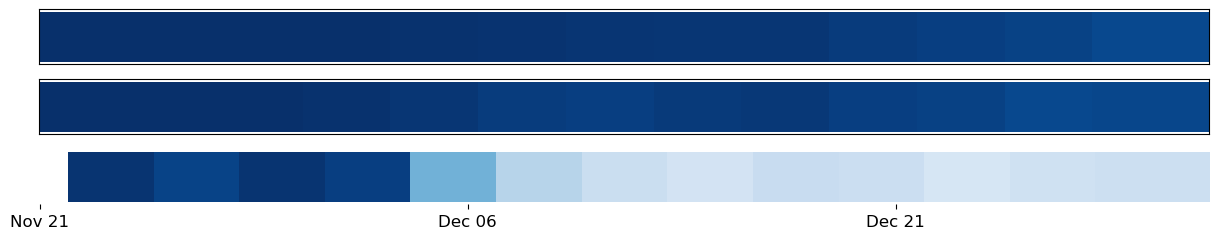

In [102]:
# newest as of 25Jun2025. 
# to do: 
# 1. copy/paste all values from west csv's and save as new one. 
# 2. do same for east. 
# 3. update the pd.read_csv links below, re-run. 

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# load time
# Load data from one sea ice corridor csv file only to set x-axis limits (re-name from wave_data to time_data later)
wave_data = pd.read_csv('/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/NearShelfNearStation_nonblack_pixel_counts_multday_2014_2015_2016_new_v2.csv')
wave_data['time_UTC'] = pd.to_datetime(wave_data['Time_UTC'], errors='coerce')
#wave_data['time_UTC_num'] = mdates.date2num(wave_data['Time_UTC']) #ValueError: Could not convert object to NumPy datetime

# Filter to match analysis window
start_date = pd.Timestamp('2014-11-21', tz='UTC') #2014-11-01 00:00:00+00:00 2017-01-01 00:00:00+00:00
end_date = pd.Timestamp('2015-01-01', tz='UTC') #'2015-01-01', end='2015-04-01'

wave_data = wave_data[
    (wave_data['time_UTC'] >= start_date) & 
    (wave_data['time_UTC'] <= end_date)
].copy()

# Load sea ice data
ice_file_near = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/NearShelfNearStation_nonblack_pixel_counts_multday_2014_2015_2016_new_v2.csv'
ice_file_west = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/WestCorr_nonblack_pixel_counts_multday_2014_2015_2016_new_v2.csv'
ice_file_east = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/EastCorr_nonblack_pixel_counts_multday_2014_2015_2016_new_v2.csv'

sea_ice_df_near = pd.read_csv(ice_file_near, parse_dates=['Time_UTC'])
sea_ice_df_west = pd.read_csv(ice_file_west, parse_dates=['Time_UTC'])
sea_ice_df_east = pd.read_csv(ice_file_east, parse_dates=['Time_UTC'])

sea_ice_df_near = sea_ice_df_near[(sea_ice_df_near['Time_UTC'] >= start_date) & (sea_ice_df_near['Time_UTC'] <= end_date)].copy()
sea_ice_df_west = sea_ice_df_west[(sea_ice_df_west['Time_UTC'] >= start_date) & (sea_ice_df_west['Time_UTC'] <= end_date)].copy()
sea_ice_df_east = sea_ice_df_east[(sea_ice_df_east['Time_UTC'] >= start_date) & (sea_ice_df_east['Time_UTC'] <= end_date)].copy()

sea_ice_df_near['time_num'] = mdates.date2num(sea_ice_df_near['Time_UTC'])
sea_ice_df_west['time_num'] = mdates.date2num(sea_ice_df_west['Time_UTC'])
sea_ice_df_east['time_num'] = mdates.date2num(sea_ice_df_east['Time_UTC'])

# Instead of using normalized relative to season, use nonblack sample divided by max(nonblack) for full time series. 
# Results in a percentage (values in csv in 0.9933... form), and with the column header 
#'nonblack-FullTSeries_Max_closedSea' is data to plot, ex. 0.99888.

norm_near = (sea_ice_df_near['nonblack-FullTSeries_Max_closedSea']) # example output: 185    0.148146
norm_west = (sea_ice_df_west['nonblack-FullTSeries_Max_closedSea'])
norm_east = (sea_ice_df_east['nonblack-FullTSeries_Max_closedSea'])
    
cmap = plt.cm.Blues

# Create figure
fig = plt.figure(figsize=(15, 2.5))
left = 0.123
width = 0.78
height = 0.22
bottom_near = 0.1
bottom_west = 0.38
bottom_east = 0.66  # new top strip

# East Corridor Strip
strip_ax_east = fig.add_axes([left, bottom_east, width, height])
strip_ax_east.set_xlim(wave_data['time_UTC'].min(), wave_data['time_UTC'].max())
#strip_ax_east.set_xlim(wave_data['time_UTC_num'].min(), wave_data['time_UTC_num'].max())
strip_ax_east.set_xticks([])
strip_ax_east.set_yticks([])
strip_ax_east.set_frame_on(True)

for i in range(len(sea_ice_df_east) - 1):
    #val = sea_ice_df_east['nonblack'].iloc[i]
    #color = cmap(norm_east(val))
    val = sea_ice_df_east['nonblack-FullTSeries_Max_closedSea'].iloc[i]
    color = cmap(val)  # val should already be between 0 and 1
    t1 = sea_ice_df_east['time_num'].iloc[i]
    t2 = sea_ice_df_east['time_num'].iloc[i + 1]
    strip_ax_east.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# West Corridor Strip
strip_ax_west = fig.add_axes([left, bottom_west, width, height])
strip_ax_west.set_xlim(wave_data['time_UTC'].min(), wave_data['time_UTC'].max())
#strip_ax_west.set_xlim(wave_data['time_UTC_num'].min(), wave_data['time_UTC_num'].max())
strip_ax_west.set_xticks([])
strip_ax_west.set_yticks([])
strip_ax_west.set_frame_on(True)

for i in range(len(sea_ice_df_west) - 1):
    #val = sea_ice_df_west['nonblack'].iloc[i]
    #color = cmap(norm_west(val))
    val = sea_ice_df_west['nonblack-FullTSeries_Max_closedSea'].iloc[i]
    color = cmap(val)  # val should already be between 0 and 1
    t1 = sea_ice_df_west['time_num'].iloc[i]
    t2 = sea_ice_df_west['time_num'].iloc[i + 1]
    strip_ax_west.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# Near Shelf Strip
strip_ax_near = fig.add_axes([left, bottom_near, width, height])
strip_ax_near.set_xlim(wave_data['time_UTC'].min(), wave_data['time_UTC'].max())
strip_ax_near.set_xticks([])
strip_ax_near.set_yticks([])
strip_ax_near.set_frame_on(False)

for i in range(len(sea_ice_df_near) - 1):
    val = sea_ice_df_near['nonblack-FullTSeries_Max_closedSea'].iloc[i]
    color = cmap(val)  # val should already be between 0 and 1
    t1 = sea_ice_df_near['time_num'].iloc[i]
    t2 = sea_ice_df_near['time_num'].iloc[i + 1]
    strip_ax_near.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# Optional: Add date ticks on bottom strip only
strip_ax_near.set_xticks(pd.date_range(start='2014-11-21', end='2015-01-01', freq='15D'))
strip_ax_near.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
strip_ax_near.tick_params(axis='x', labelsize=12)

# add corridor labels to the left of the color sticks
#fig.text(0.02, bottom_east + height / 2, 'East Corridor 2014', va='top', ha='center', fontsize=12)
#fig.text(0.02, bottom_west + height / 2, 'West Corridor 2014 ', va='top', ha='center', fontsize=12)
#fig.text(0.02, bottom_near + height / 2, 'Near Shelf 2014',    va='top', ha='center', fontsize=12)

#plt.savefig('/Users/em/PROJECTS/SeaIce/FIGS/EastWestNearCorr_21NovtoJan2014_v2.png', format='png', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/em/PROJECTS/SeaIce/FIGS/EastWestNearCorr_21NovtoJan2014_nl_v2.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

/var/folders/n_/3zw40qc51xd2r3ngkqw0116h0000gn/T/ipykernel_73393/335980194.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


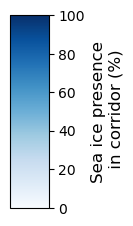

In [26]:
# creating second figure with cmap; right now 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Define the colormap — same one used in your main plot
cmap = plt.cm.Blues

# Define normalization (1 at top, 0 at bottom)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

# Create the figure and axis for the colorbar
fig, ax = plt.subplots(figsize=(0.5, 2.5))  # tall, skinny colorbar figure

# Create a colorbar
cb = mpl.colorbar.ColorbarBase(
    ax,
    cmap=cmap,
    norm=norm,
    orientation='vertical'
)

# Label the colorbar
cb.set_label('Sea ice presence in corridor (%)', fontsize=12)

# Reverse ticks to go from 1 (top) to 0 (bottom)
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_ticklabels(['0', '20', '40', '60', '80', '100'])

# Optional: Increase tick label font size
cb.ax.tick_params(labelsize=10)

plt.tight_layout()

# Save or show
# plt.savefig('/Users/em/PROJECTS/SeaIce/FIGS/Colorbar_Nonblack.png', dpi=600, bbox_inches='tight')
plt.show()


In [79]:
print(sea_ice_df_near['Time_UTC'].min(), sea_ice_df_near['Time_UTC'].max())
print(sea_ice_df_west['Time_UTC'].min(), sea_ice_df_west['Time_UTC'].max())
print(sea_ice_df_east['Time_UTC'].min(), sea_ice_df_east['Time_UTC'].max())

2014-11-22 00:00:00+00:00 2015-01-01 00:00:00+00:00
2014-11-22 00:00:00+00:00 2015-01-01 00:00:00+00:00
2014-11-22 00:00:00+00:00 2015-01-01 00:00:00+00:00


In [ ]:
# Sea ice relative to time 90 day period 
# Ex: start_date = pd.Timestamp('2016-10-01', tz='UTC'), end_date = pd.Timestamp('2017-01-01', tz='UTC')
# All 3 corridors

import pandas as pd

# Define start and end datetimes as strings
start = '2016-10-01T00:00:00Z'
end   = '2017-01-01T00:00:00Z'

# Generate hourly datetime range
time_range = pd.date_range(start=start, end=end, freq='H')

# Format to ISO8601 with 'Z'
time_strings = time_range.strftime('%Y-%m-%dT%H:%M:%SZ')

# Create DataFrame
df = pd.DataFrame({'time_UTC2': time_strings})

# Save to CSV file (no index column)
df.to_csv('/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/2016Oct1toJan1_hourly_times.csv', index=False)

In [ ]:
# Sea ice relative to time 90 day period 
# Ex: start_date = pd.Timestamp('2016-10-01', tz='UTC'), end_date = pd.Timestamp('2017-01-01', tz='UTC')
# All 3 corridors

# csv files imported from matlab code: 
#1. [.../PROJECTS/SeaIce/SeaIceCorridor_Apr25/EastCorridorSeaIcePixelCount_multday.m]
#2. [.../PROJECTS/SeaIce/SeaIceCorridor_Apr25/WestCorridorSeaIcePixelCount_multday.m]
#3. [.../PROJECTS/SeaIce/SeaIceCorridor_Apr25/NearShelfSeaIcePixelCount_multday.m]

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Load WaveWatch data only to set x-axis limits
wave_data = pd.read_csv('/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/2016Oct1toJan1_hourly_times.csv')
wave_data['time_UTC2'] = pd.to_datetime(wave_data['time_UTC2'], errors='coerce')
wave_data['time_UTC2_num'] = mdates.date2num(wave_data['time_UTC2'])

# Load sea ice data
ice_file_near = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/NearShelfNearStation_nonblack_pixel_counts_multday_2016_Oct1toJan1_new_v2.csv'
ice_file_west = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/WestCorr_nonblack_pixel_counts_multday_2016_Oct1toJan1_new_v2.csv'
ice_file_east = '/Users/em/PROJECTS/SeaIce/SeaIceCorridor_Apr25/EastCorr_nonblack_pixel_counts_multday_2016_Oct1toJan1_new_v2.csv'

sea_ice_df_near = pd.read_csv(ice_file_near, parse_dates=['Time_UTC'])
sea_ice_df_west = pd.read_csv(ice_file_west, parse_dates=['Time_UTC'])
sea_ice_df_east = pd.read_csv(ice_file_east, parse_dates=['Time_UTC'])

# Filter to match analysis window
start_date = pd.Timestamp('2016-10-01', tz='UTC')
end_date = pd.Timestamp('2017-01-01', tz='UTC')

sea_ice_df_near = sea_ice_df_near[(sea_ice_df_near['Time_UTC'] >= start_date) & (sea_ice_df_near['Time_UTC'] <= end_date)].copy()
sea_ice_df_west = sea_ice_df_west[(sea_ice_df_west['Time_UTC'] >= start_date) & (sea_ice_df_west['Time_UTC'] <= end_date)].copy()
sea_ice_df_east = sea_ice_df_east[(sea_ice_df_east['Time_UTC'] >= start_date) & (sea_ice_df_east['Time_UTC'] <= end_date)].copy()

sea_ice_df_near['time_num'] = mdates.date2num(sea_ice_df_near['Time_UTC'])
sea_ice_df_west['time_num'] = mdates.date2num(sea_ice_df_west['Time_UTC'])
sea_ice_df_east['time_num'] = mdates.date2num(sea_ice_df_east['Time_UTC'])

# Normalize pixel counts for color mapping
norm_near = plt.Normalize(sea_ice_df_near['nonblack'].min(), sea_ice_df_near['nonblack'].max())
norm_west = plt.Normalize(sea_ice_df_west['nonblack'].min(), sea_ice_df_west['nonblack'].max())
norm_east = plt.Normalize(sea_ice_df_east['nonblack'].min(), sea_ice_df_east['nonblack'].max())

cmap = plt.cm.Blues

# Create figure
fig = plt.figure(figsize=(15, 2.5))
left = 0.123
width = 0.78
height = 0.22
bottom_near = 0.1
bottom_west = 0.38
bottom_east = 0.66  # new top strip

# East Corridor Strip
strip_ax_east = fig.add_axes([left, bottom_east, width, height])
strip_ax_east.set_xlim(wave_data['time_UTC2_num'].min(), wave_data['time_UTC2_num'].max())
strip_ax_east.set_xticks([])
strip_ax_east.set_yticks([])
strip_ax_east.set_frame_on(False)

for i in range(len(sea_ice_df_east) - 1):
    val = sea_ice_df_east['nonblack'].iloc[i]
    color = cmap(norm_east(val))
    t1 = sea_ice_df_east['time_num'].iloc[i]
    t2 = sea_ice_df_east['time_num'].iloc[i + 1]
    strip_ax_east.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# West Corridor Strip
strip_ax_west = fig.add_axes([left, bottom_west, width, height])
strip_ax_west.set_xlim(wave_data['time_UTC2_num'].min(), wave_data['time_UTC2_num'].max())
strip_ax_west.set_xticks([])
strip_ax_west.set_yticks([])
strip_ax_west.set_frame_on(False)

for i in range(len(sea_ice_df_west) - 1):
    val = sea_ice_df_west['nonblack'].iloc[i]
    color = cmap(norm_west(val))
    #val = sea_ice_df_west['nonblack-FullTSeries_Max_closedSea'].iloc[i]
    #color = cmap(val)  # val should already be between 0 and 1
    t1 = sea_ice_df_west['time_num'].iloc[i]
    t2 = sea_ice_df_west['time_num'].iloc[i + 1]
    strip_ax_west.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# Near Shelf Strip
strip_ax_near = fig.add_axes([left, bottom_near, width, height])
strip_ax_near.set_xlim(wave_data['time_UTC2_num'].min(), wave_data['time_UTC2_num'].max())
strip_ax_near.set_xticks([])
strip_ax_near.set_yticks([])
strip_ax_near.set_frame_on(False)

for i in range(len(sea_ice_df_near) - 1):
    val = sea_ice_df_near['nonblack'].iloc[i]
    color = cmap(norm_near(val))
    #val = sea_ice_df_near['nonblack-FullTSeries_Max_closedSea'].iloc[i]
    #color = cmap(val)  # val should already be between 0 and 1
    t1 = sea_ice_df_near['time_num'].iloc[i]
    t2 = sea_ice_df_near['time_num'].iloc[i + 1]
    strip_ax_near.fill_between([t1, t2], 0, 1, color=color, linewidth=0)

# Optional: Add date ticks on bottom strip only
strip_ax_near.set_xticks(pd.date_range(start='2016-10-01', end='2017-01-01', freq='15D'))
strip_ax_near.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
strip_ax_near.tick_params(axis='x', labelsize=12)

# add corridor labels to the left of the color sticks
fig.text(0.02, bottom_east + height / 2, 'East Corridor 2016', va='top', ha='center', fontsize=12)
fig.text(0.02, bottom_west + height / 2, 'West Corridor 2016 ', va='top', ha='center', fontsize=12)
fig.text(0.02, bottom_near + height / 2, 'Near Shelf 2016',    va='top', ha='center', fontsize=12)

#plt.savefig('/Users/em/PROJECTS/SeaIce/FIGS/EastWestNearCorr_OcttoDec2016.png', format='png', dpi=600, bbox_inches='tight')
#plt.savefig('/Users/em/PROJECTS/SeaIce/FIGS/EastWestNearCorr_OcttoDec2016_nl.png', format='png', dpi=600, bbox_inches='tight')
plt.show()